In [6]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt

In [20]:
D_E = 10
D_S = 10
R = .03
k_f = 0.98e-2

In [21]:
def erbchap(D, R, lamb):
    kappa = np.sqrt(lamb/D)*R
    return 4. * np.pi * D * R * (1. - (1./kappa)*np.tanh(kappa))

In [22]:
objective = lambda lambk: np.abs(k_f - erbchap(D_E+D_S, R, lambk))

In [23]:
result = so.minimize(objective, x0=10, tol=1e-16, method='SLSQP', bounds=[(0., None)], 
                     options={"maxiter":1e10, "disp": True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.185751579730777e-16
            Iterations: 22
            Function evaluations: 92
            Gradient evaluations: 22


In [24]:
result.x

array([ 86.78638438])

/srv/public/miniconda3/envs/rff/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/public/miniconda3/envs/rff/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


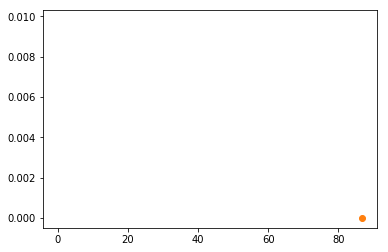

In [25]:
xs = np.linspace(0, 1e-5, 100)
plt.plot(xs, objective(xs))
plt.plot(result.x, objective(result.x), 'o')
plt.show()

In [26]:
erbchap(D_E+D_S, R, result.x)

array([ 0.0098])